### Analise graus de liberdade dos parametros

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# leitura dos parametros com diferentes graus de liberdade

pth_out = '../data/proc/'

# graus de liberdade
gls = ['02', '04', '08', '16', '32', '64']

d = {}
for gl in gls:
    df = pd.read_csv(pth_out + 'param_siodoc_{}.csv'.format(gl),
                        parse_dates=True, index_col='date')
    d[gl] = df.rolling(window=3, center=True).mean().loc['2014-08']
    # d[gl] = df.loc['2014-08']

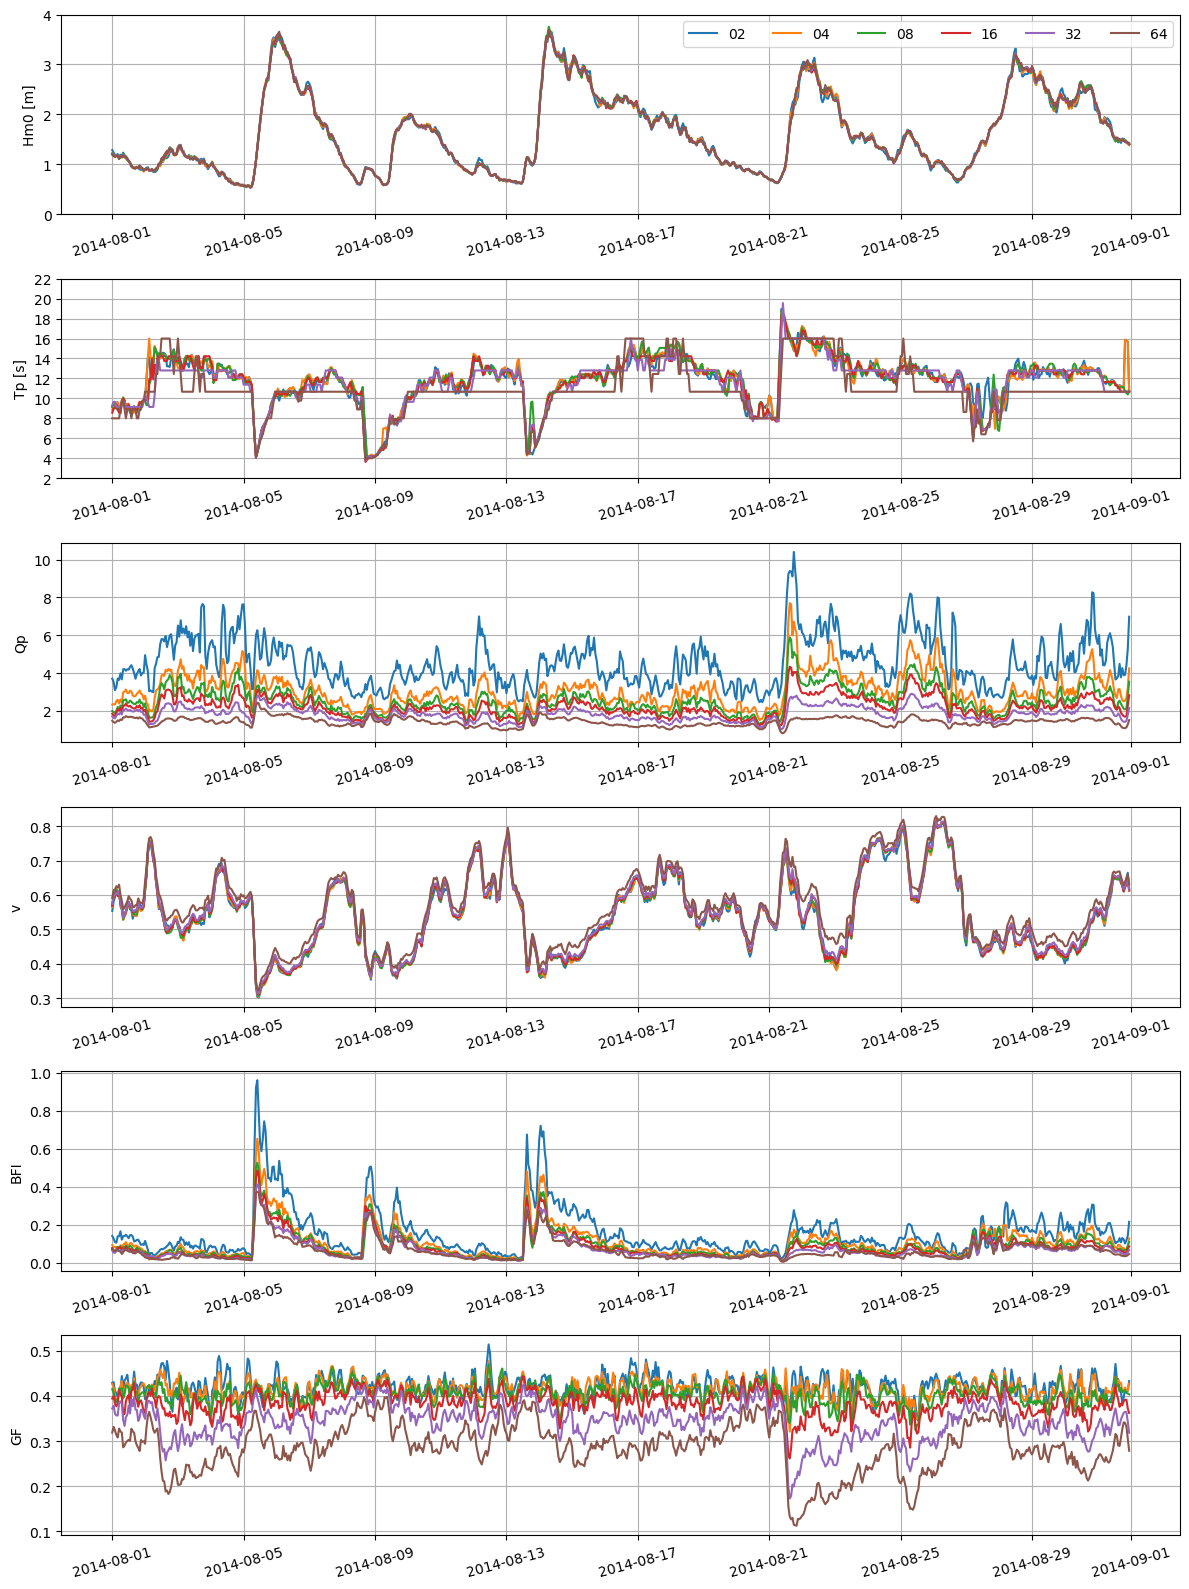

In [60]:
vv = ['hm0', 'tp', 'Qp', 'v', 'BFI', 'GF_hilbert']

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(611)
ax.plot(d['02'][vv[0]], '-', label='02')
ax.plot(d['04'][vv[0]], '-', label='04')
ax.plot(d['08'][vv[0]], '-', label='08')
ax.plot(d['16'][vv[0]], '-', label='16')
ax.plot(d['32'][vv[0]], '-', label='32')
ax.plot(d['64'][vv[0]], '-', label='64')
ax.legend(loc=1, ncol=6)
ax.grid()
ax.set_ylim(0, 4)
ax.set_ylabel('Hm0 [m]')
plt.xticks(rotation=15)

ax = fig.add_subplot(612)
ax.plot(d['02'][vv[1]], '-', label='02')
ax.plot(d['04'][vv[1]], '-', label='04')
ax.plot(d['08'][vv[1]], '-', label='08')
ax.plot(d['16'][vv[1]], '-', label='16')
ax.plot(d['32'][vv[1]], '-', label='32')
ax.plot(d['64'][vv[1]], '-', label='64')
# ax.legend(loc=1, ncol=6)
ax.grid()
ax.set_yticks(np.arange(0, 24, 2))
ax.set_ylim(2, 22)
ax.set_ylabel('Tp [s]')
plt.xticks(rotation=15)

ax = fig.add_subplot(613)
ax.plot(d['02'][vv[2]], '-', label='02')
ax.plot(d['04'][vv[2]], '-', label='04')
ax.plot(d['08'][vv[2]], '-', label='08')
ax.plot(d['16'][vv[2]], '-', label='16')
ax.plot(d['32'][vv[2]], '-', label='32')
ax.plot(d['64'][vv[2]], '-', label='64')
# ax.legend(loc=1, ncol=6)
ax.grid()
# ax.set_yticks(np.arange(0, 415, 45))
# ax.set_ylim(0, 360)
ax.set_ylabel('Qp');
plt.xticks(rotation=15)

ax = fig.add_subplot(614)
ax.plot(d['02'][vv[3]], '-', label='02')
ax.plot(d['04'][vv[3]], '-', label='04')
ax.plot(d['08'][vv[3]], '-', label='08')
ax.plot(d['16'][vv[3]], '-', label='16')
ax.plot(d['32'][vv[3]], '-', label='32')
ax.plot(d['64'][vv[3]], '-', label='64')
# ax.legend(loc=1, ncol=6)
ax.grid()
# ax.set_yticks(np.arange(0, 105, 15))
# ax.set_ylim(0, 80)
ax.set_ylabel('v');
plt.xticks(rotation=15)

ax = fig.add_subplot(615)
ax.plot(d['02'][vv[4]], '-', label='02')
ax.plot(d['04'][vv[4]], '-', label='04')
ax.plot(d['08'][vv[4]], '-', label='08')
ax.plot(d['16'][vv[4]], '-', label='16')
ax.plot(d['32'][vv[4]], '-', label='32')
ax.plot(d['64'][vv[4]], '-', label='64')
# ax.legend(loc=1, ncol=6)
ax.grid()
# ax.set_yticks(np.arange(0, 14, 2))
# ax.set_ylim(0, 8)
ax.set_ylabel('BFI');
plt.xticks(rotation=15)

ax = fig.add_subplot(616)
ax.plot(d['02'][vv[5]], '-', label='02')
ax.plot(d['04'][vv[5]], '-', label='04')
ax.plot(d['08'][vv[5]], '-', label='08')
ax.plot(d['16'][vv[5]], '-', label='16')
ax.plot(d['32'][vv[5]], '-', label='32')
ax.plot(d['64'][vv[5]], '-', label='64')
# ax.legend(loc=1, ncol=6)
ax.grid()
# ax.set_yticks(np.arange(0.3, 1.1, .1))
# ax.set_ylim(0.3, 0.7)
ax.set_ylabel('GF');
plt.xticks(rotation=15);

fig.tight_layout()

### Plota GF e BFI

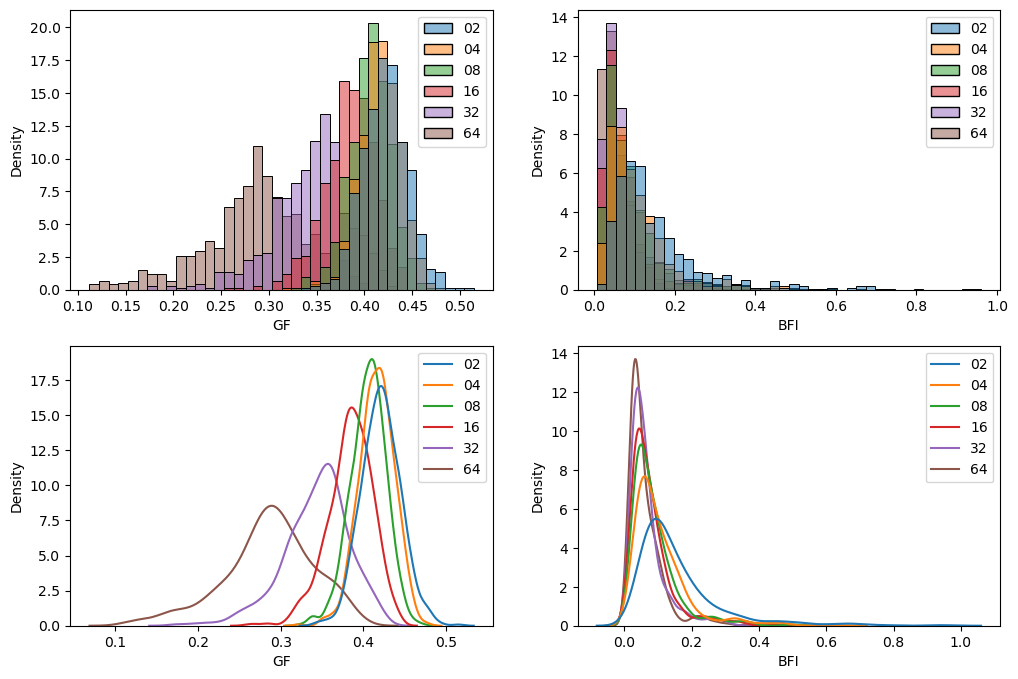

In [61]:
# Histogramas de GF e BFI

var1 = 'GF_hilbert'
var2 = 'BFI'

v1 = pd.DataFrame([d['02'][var1],
                   d['04'][var1],
                   d['08'][var1],
                   d['16'][var1],
                   d['32'][var1],
                   d['64'][var1]]).T
v1.columns = ['02', '04', '08', '16', '32', '64']

v2 = pd.DataFrame([d['02'][var2],
                   d['04'][var2],
                   d['08'][var2],
                   d['16'][var2],
                   d['32'][var2],
                   d['64'][var2]]).T
v2.columns = ['02', '04', '08', '16', '32', '64']

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.histplot(ax=ax1, data=v1, x=None, hue=None, bins=40, stat='density', common_norm=False);
sns.histplot(ax=ax2, data=v2, x=None, hue=None, bins=40, stat='density', common_norm=False);
sns.kdeplot(ax=ax3, data=v1, x=None, hue=None, common_norm=False);
sns.kdeplot(ax=ax4, data=v2, x=None, hue=None, common_norm=False);

# ax1.set_xlim(0.2, 0.6)
# ax2.set_xlim(0, 1.2)
# ax3.set_xlim(0.2, 0.6)
# ax4.set_xlim(0, 1.2)

ax1.set_xlabel('GF')
ax2.set_xlabel('BFI')
ax3.set_xlabel('GF')
ax4.set_xlabel('BFI');


### Monta tabela com parametros medios par diferentes graus de liberdade

In [62]:
vv = ['hm0', 'tp', 'Qp', 'v', 'BFI', 'GF_hilbert']

aa = pd.DataFrame()

for i in d.keys():
    aa[i] = d[i][vv].mean()
aa

,02,04,08,16,32,64
hm0,1.628254,1.629108,1.628724,1.627937,1.629684,1.631395
tp,11.820395,11.845488,11.804288,11.709388,11.494419,10.770768
Qp,4.558320,3.087993,2.565688,2.225498,1.846704,1.420951
v,0.541672,0.542309,0.542522,0.543991,0.549081,0.568515
BFI,0.157006,0.107026,0.088867,0.079825,0.069265,0.062349
GF_hilbert,0.421233,0.415905,0.405567,0.383726,0.343084,0.285722
